In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
%matplotlib notebook

# Problem 1

In [2]:
def problem1():
    df = pd.read_excel('iris_pasaport_applications.xlsx') #read the excel file in the same directory as this ipynb file
    fig = plt.figure(figsize=(8, 6)) #the figsize attribut is the parameter of figure function which allows us to change the size of the image or figure
    fig.set_facecolor("#FEF2E6") #set the background color
    plt.bar(df.Year, df.Renewal, color ='#D7CDC3') #create the bar plot for renewal column
    plt.bar(df.Year, df.FirstTime, bottom = df.Renewal, color = '#FB78A4') ##create the bar plot for FirstTime column
    plt.grid(axis='y')
    print(plt.show())

<IPython.core.display.Javascript object>


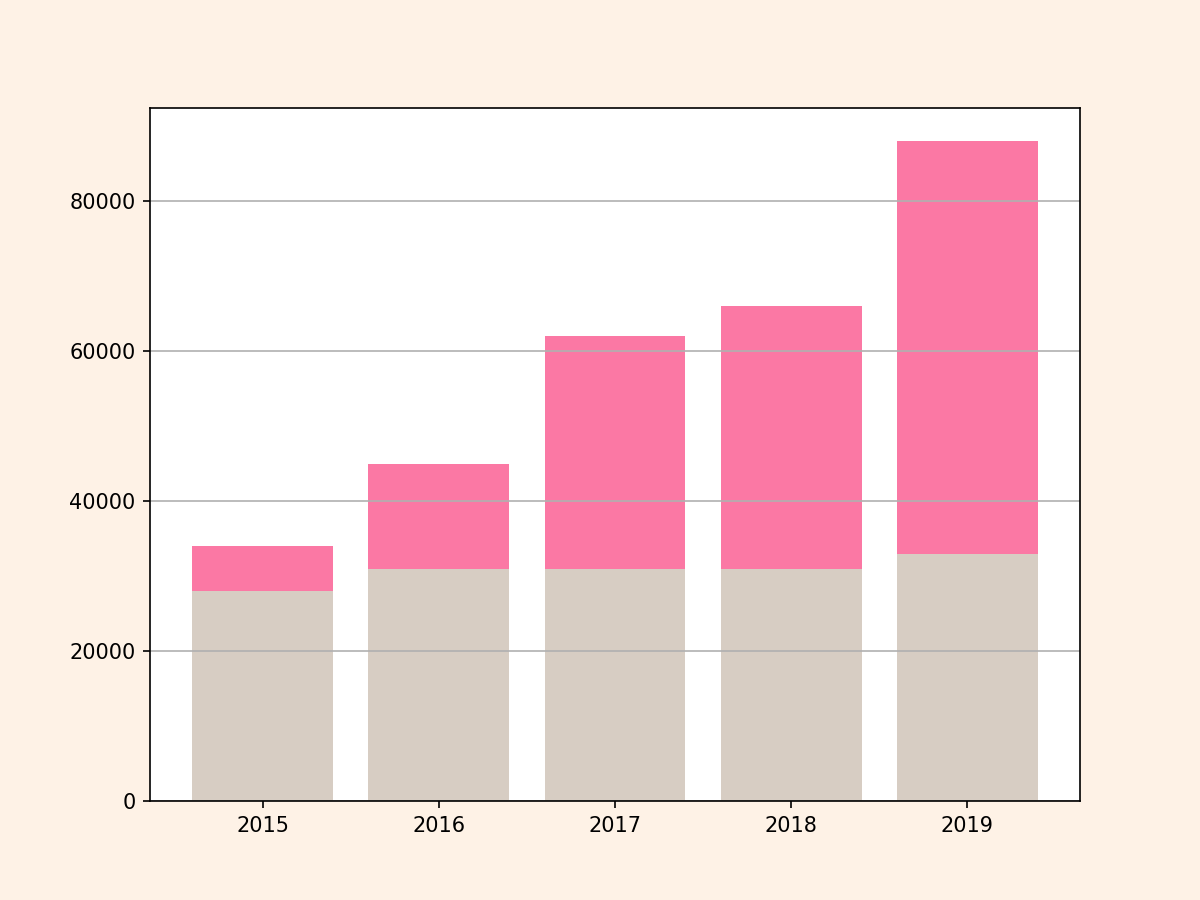

None


In [3]:
problem1()

# Problem 2

In [4]:
def problem2():
    country_index = ["Chile","India", "Canada", "France", "Italy", "US", "UK", "Israel","Germany"]
    mobility = [-6,-2,-4,-2,-2,-1,3.5,3,2]
    case = [10,50,30,15,-10,5,-10, -30,2]
    colorist = ["navy", "cyan","dodgerblue", "cyan", "cyan", "dodgerblue", "navy","navy","cyan"]
    
    fig, ax = plt.subplots(figsize =(10,10)) #create a figure
    fig.set_facecolor("#FEF2E6") #change background color
    
    plt.scatter(mobility,case,c=colorist, alpha = 0.5) #create scatter plot
    
   
    ax.axhline(y=0, color='black',lw=3) #create a horizontal line in the center of the plot
    ax.axvline(x=0, color='black',lw=3) #create a vertical line in the center of the plot

    plt.title("Countries are seeking to fully reopen while keeping the cases decline") #set the title
    plt.xlabel("Weekly change in mobility") #set the x-axis label
    plt.ylabel("Weekly change in new cases(%)") #set the y-axis label
   
    #set legend
    plt.scatter([5,5,5], [44,50,56], s=350, c=["dodgerblue","navy","cyan"], alpha=0.5)
    ax.text(6, 55, '0-20', horizontalalignment='left',fontsize=12)
    ax.text(6, 49, '20-40', horizontalalignment='left',fontsize=12)
    ax.text(6, 43, '40+', horizontalalignment='left',fontsize=12)
    
    
    ax.text(5, -40,    'Target Zone', horizontalalignment='left', fontsize=20, color='green') #put the text in the bottom right of the plot
    ax.fill_between([0,10],[-60,-60],0,alpha=0.12, color='green') #select the area and add color to the selected area
    plt.ylim(top=60, bottom=-60) #set limit to y-axis with the lowest number is -60, and the highest is 60
    plt.xticks=np.arange(-10, 11, step=5) #xticks : set data point for x- axes by using np.arange to get labels that suits the problem given
    
    #add the country name
    for i in range(len(mobility)):
        plt.annotate(country_index[i], (mobility[i], case[i] + 0.2), size = 15)
    
    plt.grid(True) 
    
    print(plt.show())

<IPython.core.display.Javascript object>


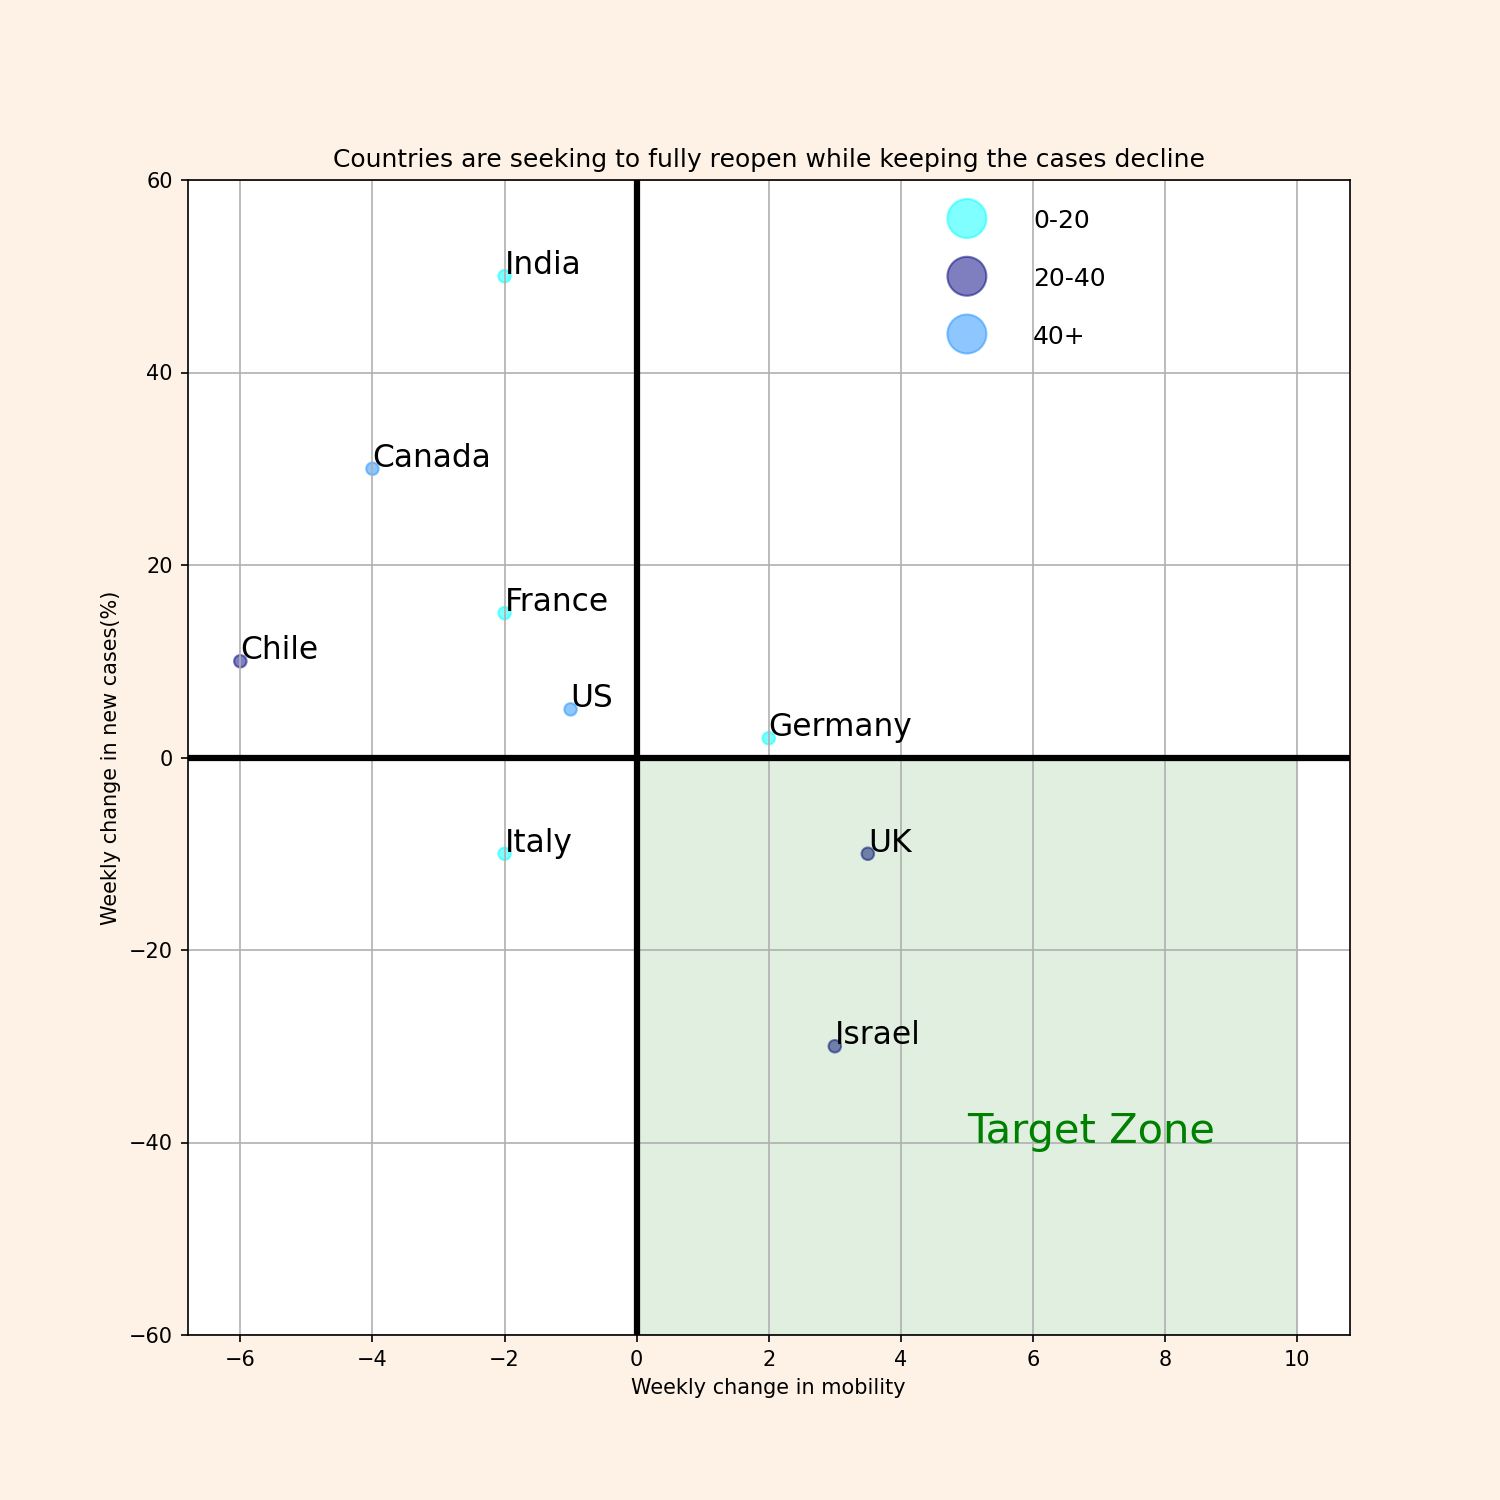

None


In [5]:
problem2()

# Problem 3

In [6]:
def problem3():
    df = pd.DataFrame(np.random.randint(10, 100, size=(100, 2))) #create a dataframe from generated-2-dimensional numpy array
    fig, axs = plt.subplots(2, 2, figsize=(10, 10)) #create subplots figure 
    #subplot 1 : line plot (row 1, colum 1)
    axs[0, 0].plot(df[0])
    axs[0, 0].set(title='Line Plot', xlabel='Random Var 1', ylabel='Value', xticks=np.arange(0, 110, step=10)) #xticks : set data point for x- axes by using np.arange to get labels that suits the problem given 
    #subplot 2 : Scatter plot (row 1, colum 2)
    axs[0, 1].scatter(df[0], df[1])
    axs[0, 1].set(title='Scatter Plot', xlabel='Random Var 1', ylabel='Random Var 2', yticks=np.arange(0, 110, step=25))
    #subplot 3 : Histrogram plot (row 2, colum 1)
    axs[1, 0].hist(df[0])
    axs[1, 0].set(title='Histogram Plot', xlabel='Random Var 1', ylabel='Frequency', yticks=np.arange(0, 20, step=5))
    #subplot 4 : Bar plot (row 2, colum 2)
    axs[1, 1].bar([1,2,3,4,5,6,7,8,9,10],  df[0].head(10))
    axs[1, 1].set(title='Bar Chart', xlabel='Random var 1', ylabel='Value', xticks=np.arange(1, 11, step=1), ylim=(0,100)) #set limit to y-axis with the lowest number is -60, and the highest is 60
    
    
    plt.suptitle('Problem 3') #set subplots title
    plt.tight_layout(pad=3, w_pad=1.0, h_pad=1.0) #adjust the space in between the plots

    print(plt.show())
    

<IPython.core.display.Javascript object>


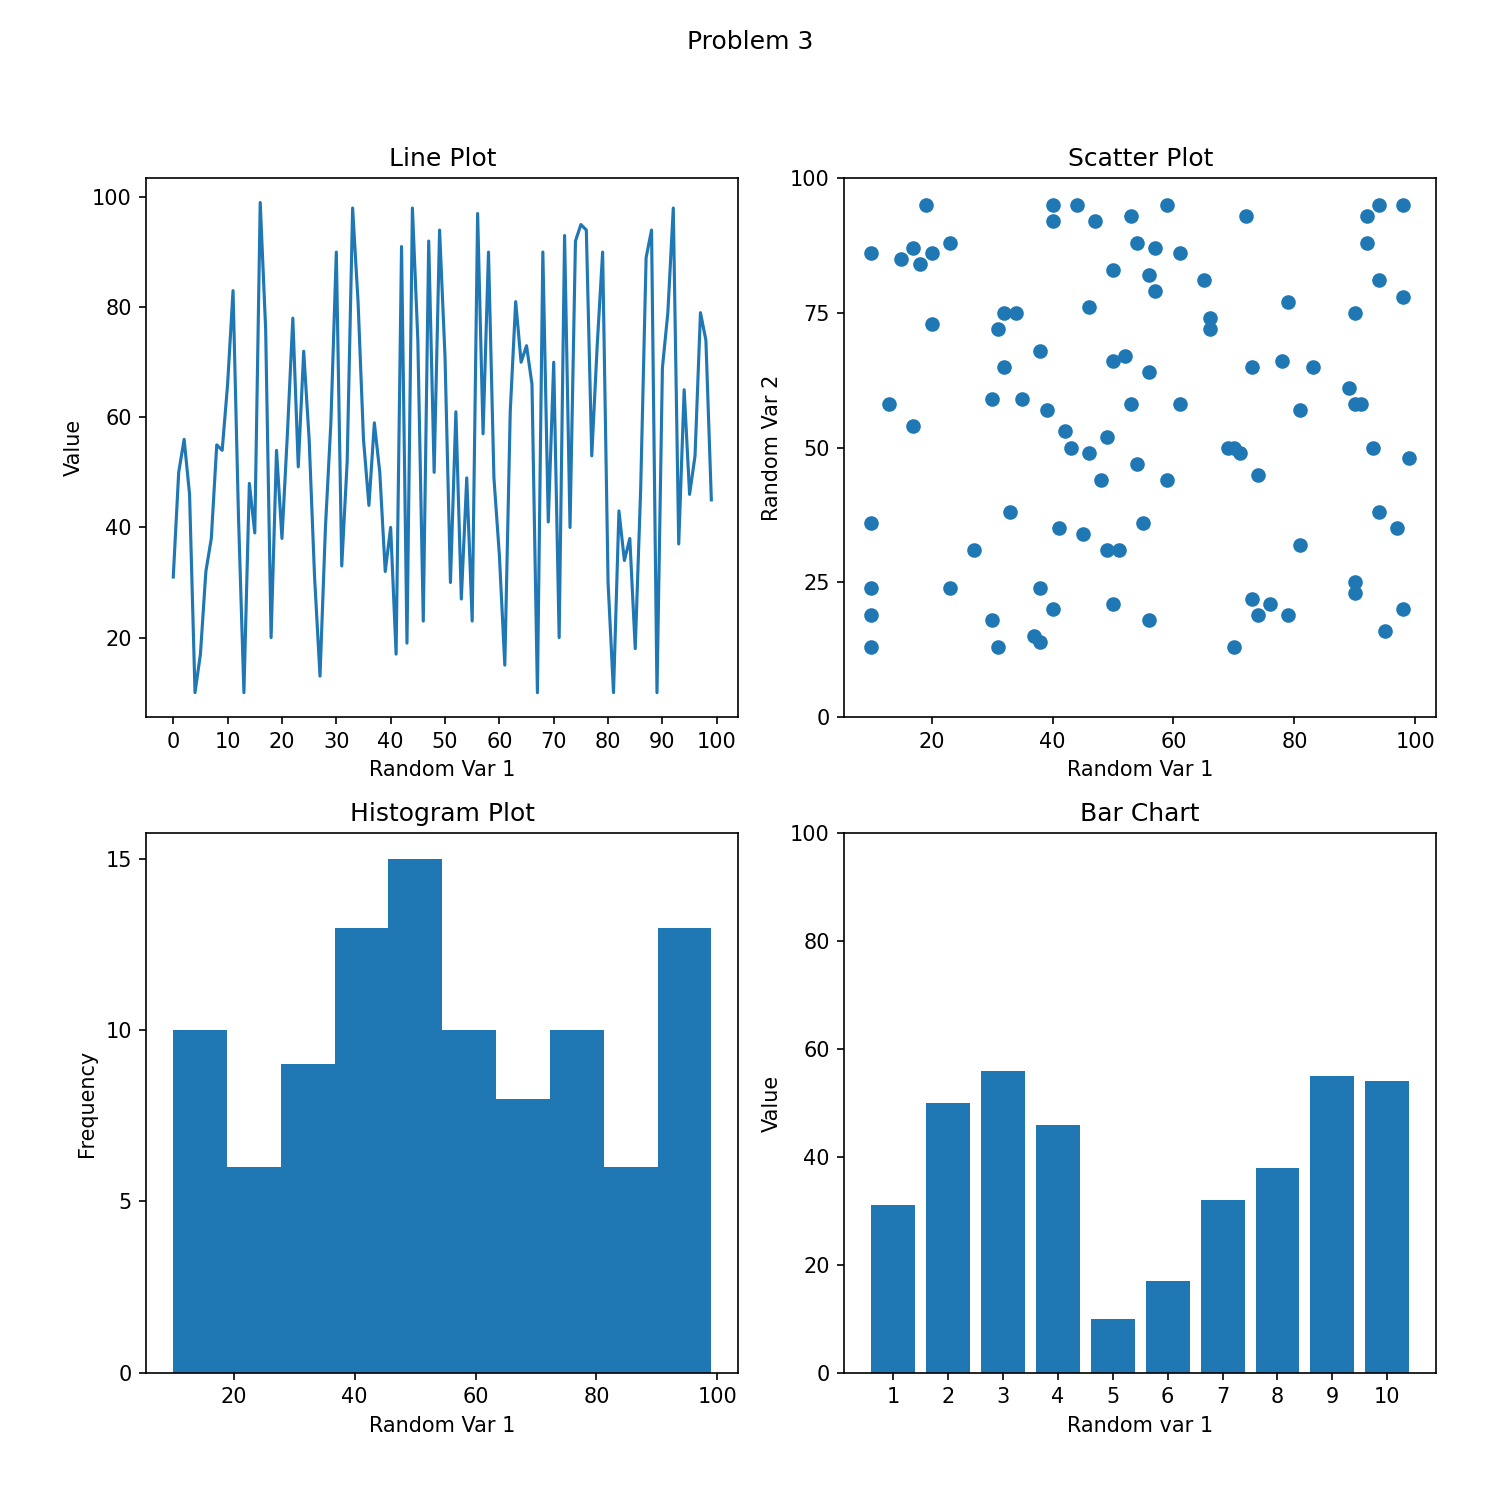

None


In [7]:
problem3()

# Problem 4

In [11]:
def problem4(filename, year):
    excel_file = pd.ExcelFile(filename)
    df = excel_file.parse("CITIES-OVER-300K") #select the "CITIES-OVER-300K" worksheet on the excel file
    df = df.fillna(0) #fill the nan values in dataframe
    year = str(year) #convert year to string
    
    top_ten = df.nlargest(n=10, columns=[year]) #get the top-10 most populated cities
    top_ten = top_ten.sort_values(by=[year], ignore_index=True) #sorted data
    fig = plt.figure(figsize=(15, 15)) #create figure with dimension 12x10 and dpi 100
    grid_spec =gridspec.GridSpec(2,2, hspace=0.1, wspace=0.5) #create the grid to place a subplot, which have 2 columns and 2 rows

    #Create subplot 1 : horizontal bar plot
    sp1 = fig.add_subplot(grid_spec[0]) #create subplot in the grid area. The subplot is located in the first row and first column
    sp1.barh(top_ten['Urban Agglomeration'], top_ten[year]) #create the horizontal bar chat
    #Write values (city and country) inside the bars
    for i, (y, v,z) in enumerate(zip(top_ten[year], top_ten['Urban Agglomeration'],top_ten['Country or area'])):
        plt.text(s=v+'', x=y, y=i+0.1, horizontalalignment="right",size=9);
        plt.text(s=z+'', x=y, y=i-0.2,  horizontalalignment="right",size=8);

    plt.yticks([]); #set y-axis with no label

    plt.text(s=year, x=35000,y=0.5,horizontalalignment="right",color='r',size=20) #add year information on the lower-right area of the plot


    #subplot 2

    sp2 = fig.add_subplot(grid_spec[1])  #create subplot in the grid area. The subplot is located in the first row and second column
    sp2.pie(top_ten[year], labels= top_ten['Urban Agglomeration'], autopct='%0.1f%%',  startangle=90); #create the pie chart

    return plt.show();

    

In [12]:
filename = "global-city-population-estimates.xls"
year = 2010

<IPython.core.display.Javascript object>


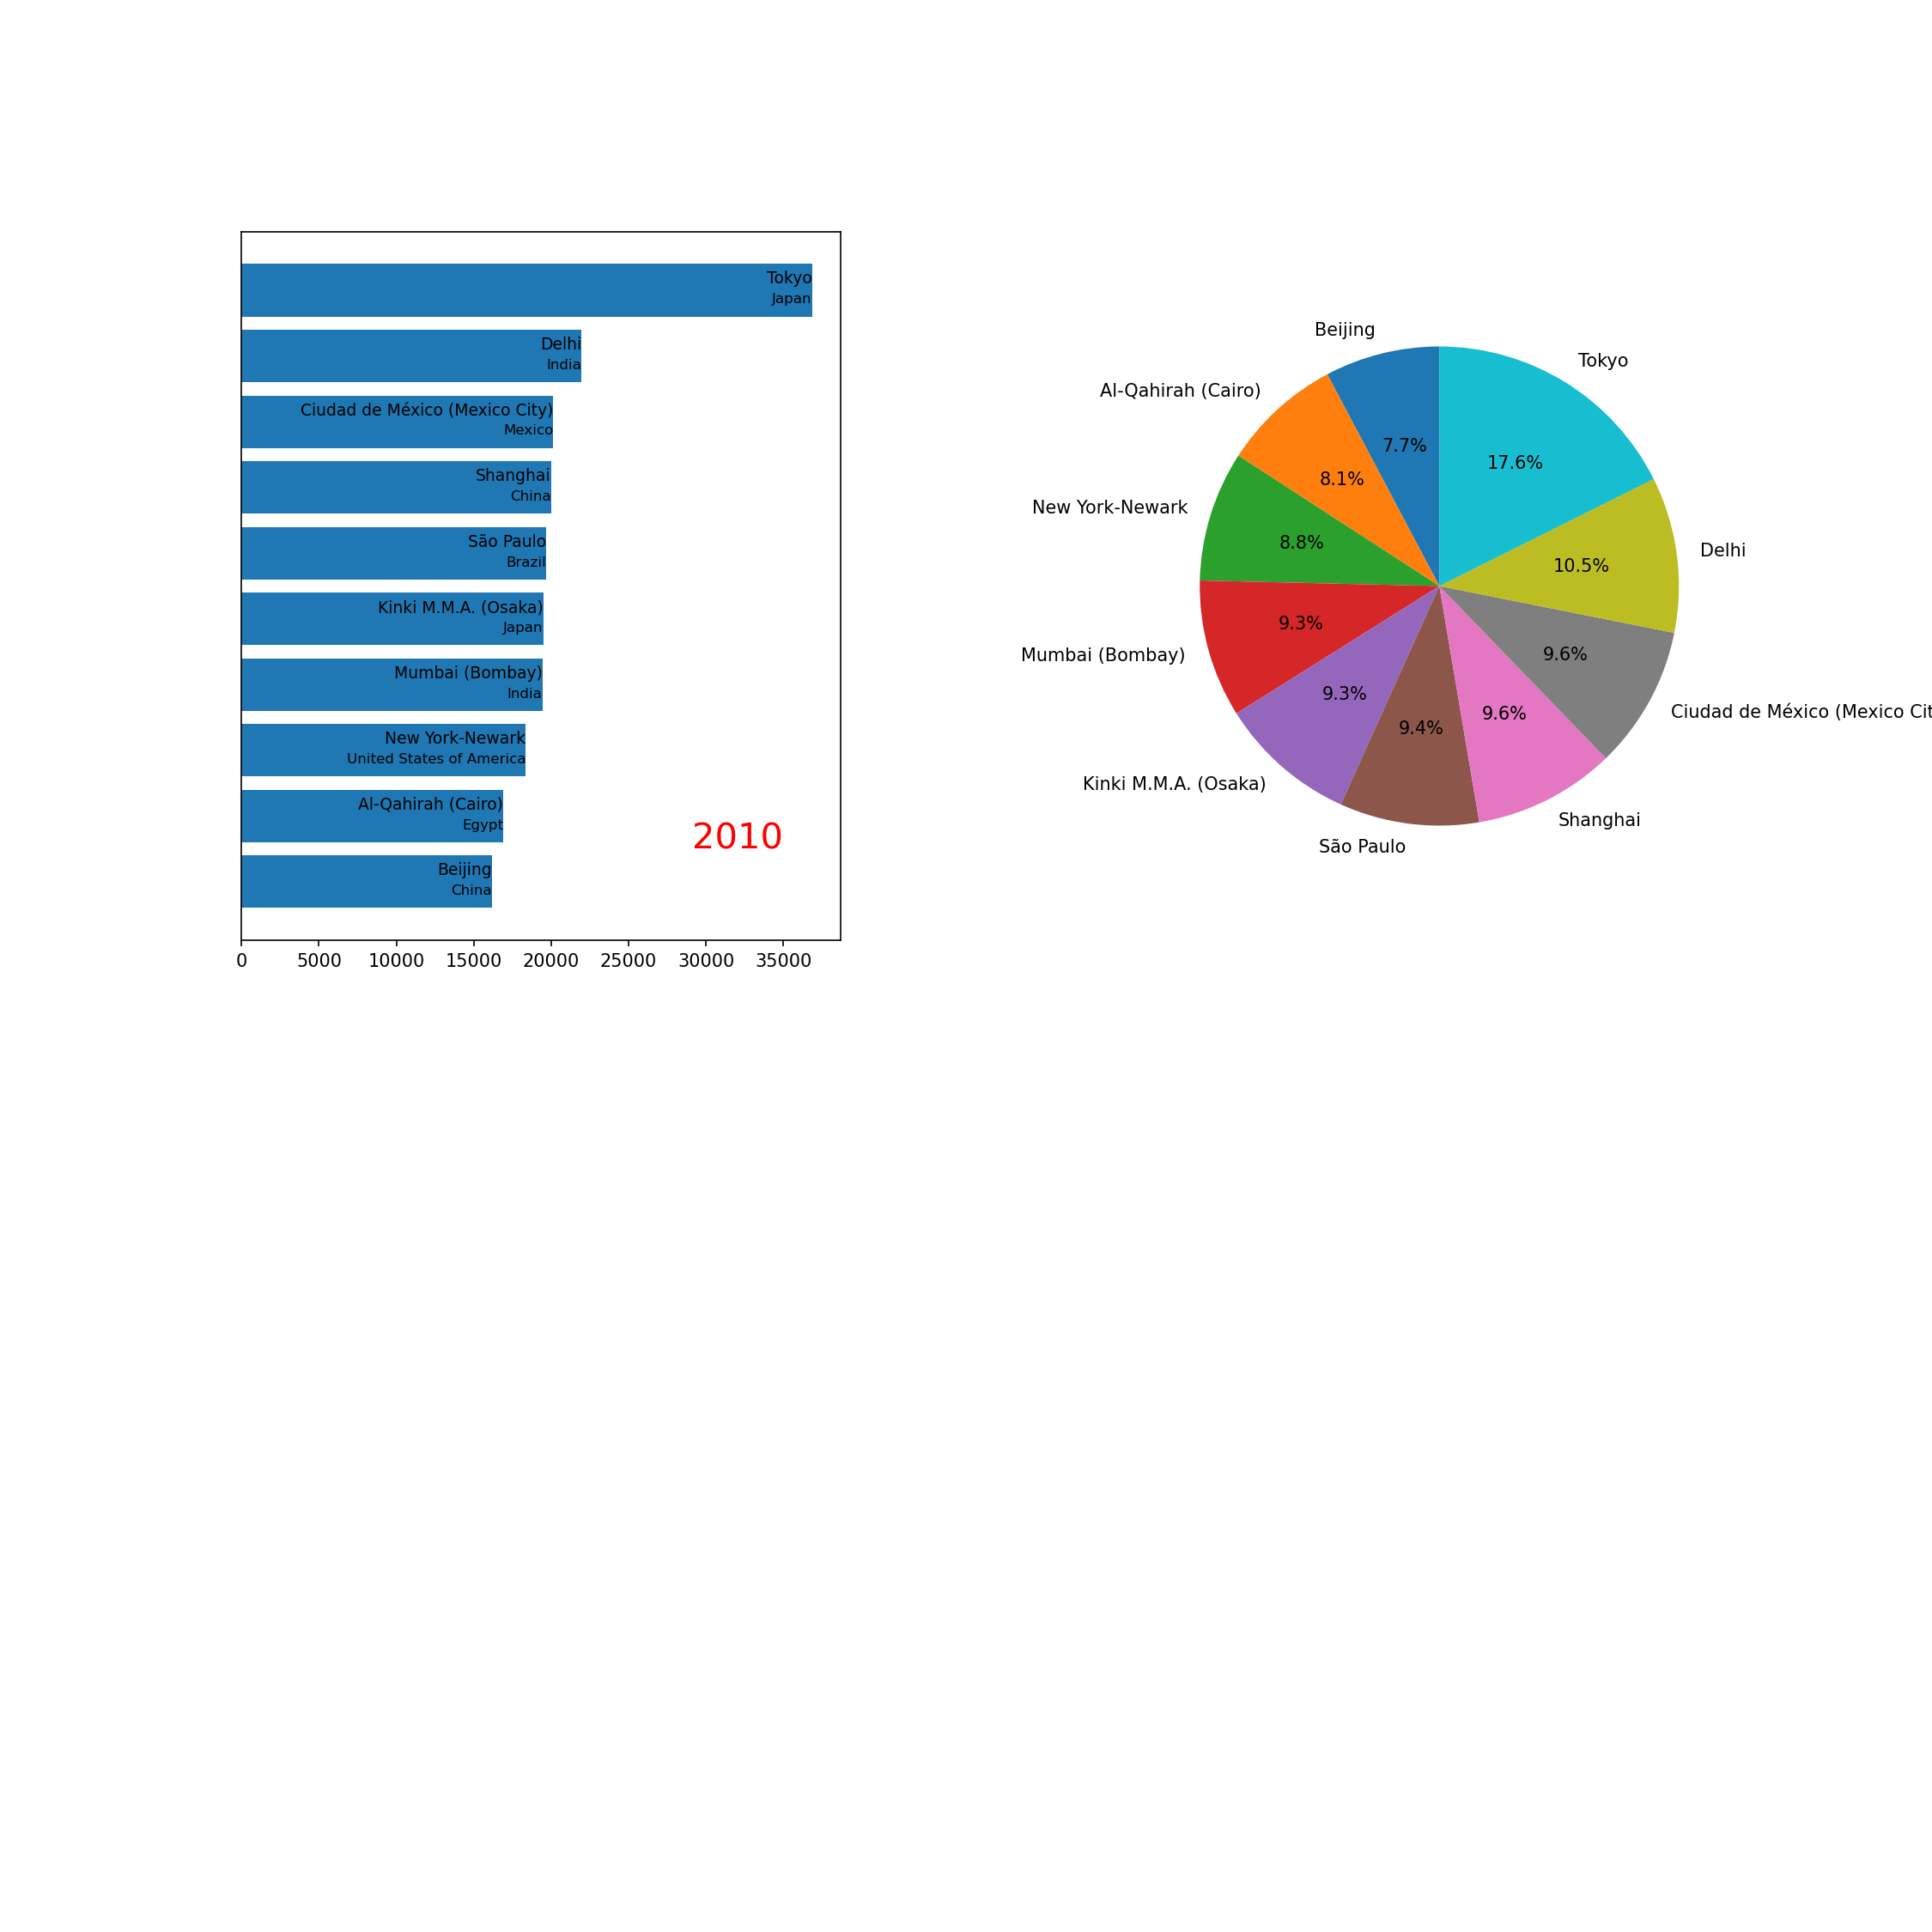

In [13]:
problem4(filename,year)

Work by Khairunnas Khairunnas (60120)